# Classification using Titanic Dataset

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

In [2]:
titanic = sns.load_dataset("titanic")
titanic = titanic.drop(columns=['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'alone'])


titanic.dropna(subset=['age', 'embarked', 'fare'], inplace=True)

titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = titanic.drop(columns=['survived'])
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

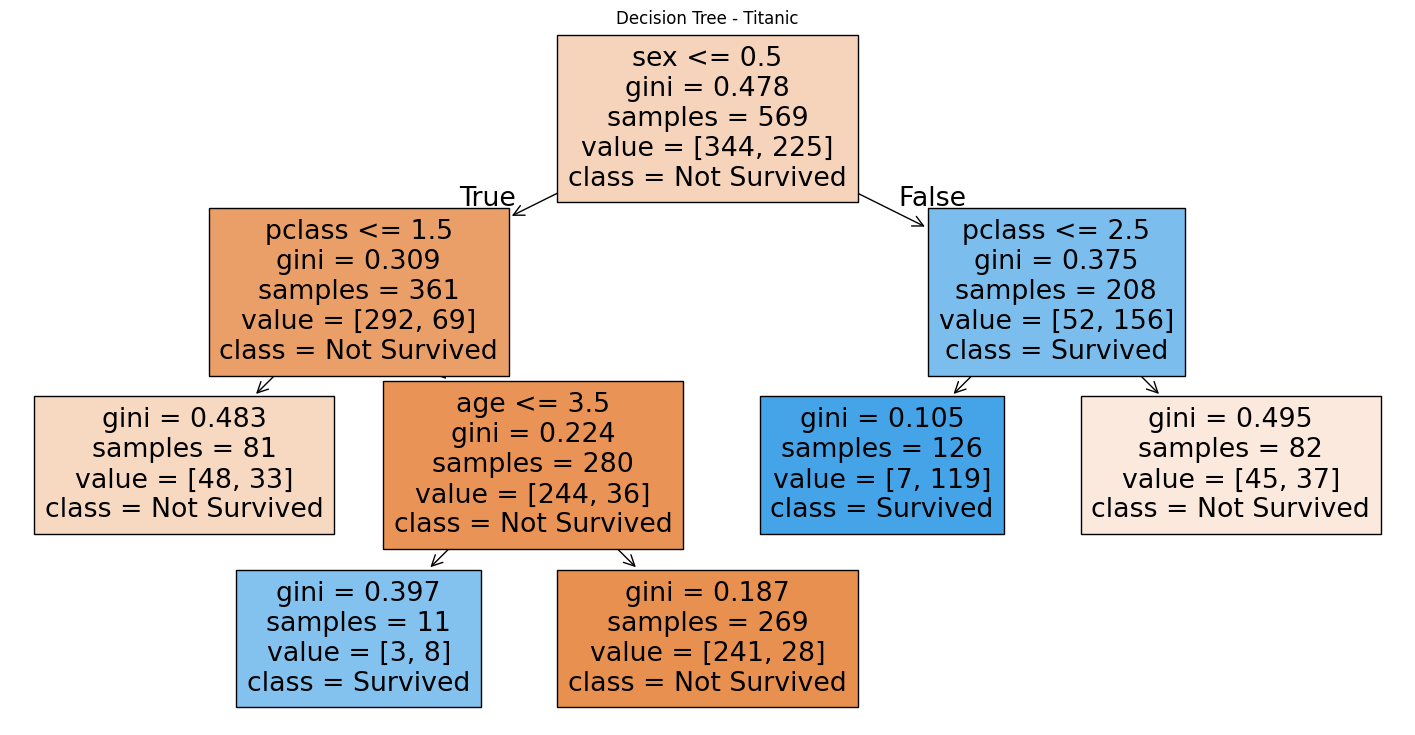

In [8]:
dtc = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.01, random_state=42)
dtc.fit(X_train, y_train)

plt.figure(figsize=(18,9))
plot_tree(dtc, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Decision Tree - Titanic")
plt.show()

In [9]:
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82        80
           1       0.89      0.52      0.66        63

    accuracy                           0.76       143
   macro avg       0.80      0.74      0.74       143
weighted avg       0.79      0.76      0.75       143

Confusion Matrix:
 [[76  4]
 [30 33]]


# Regression using Caifornia Housing Dataset

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
df = housing.frame

X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

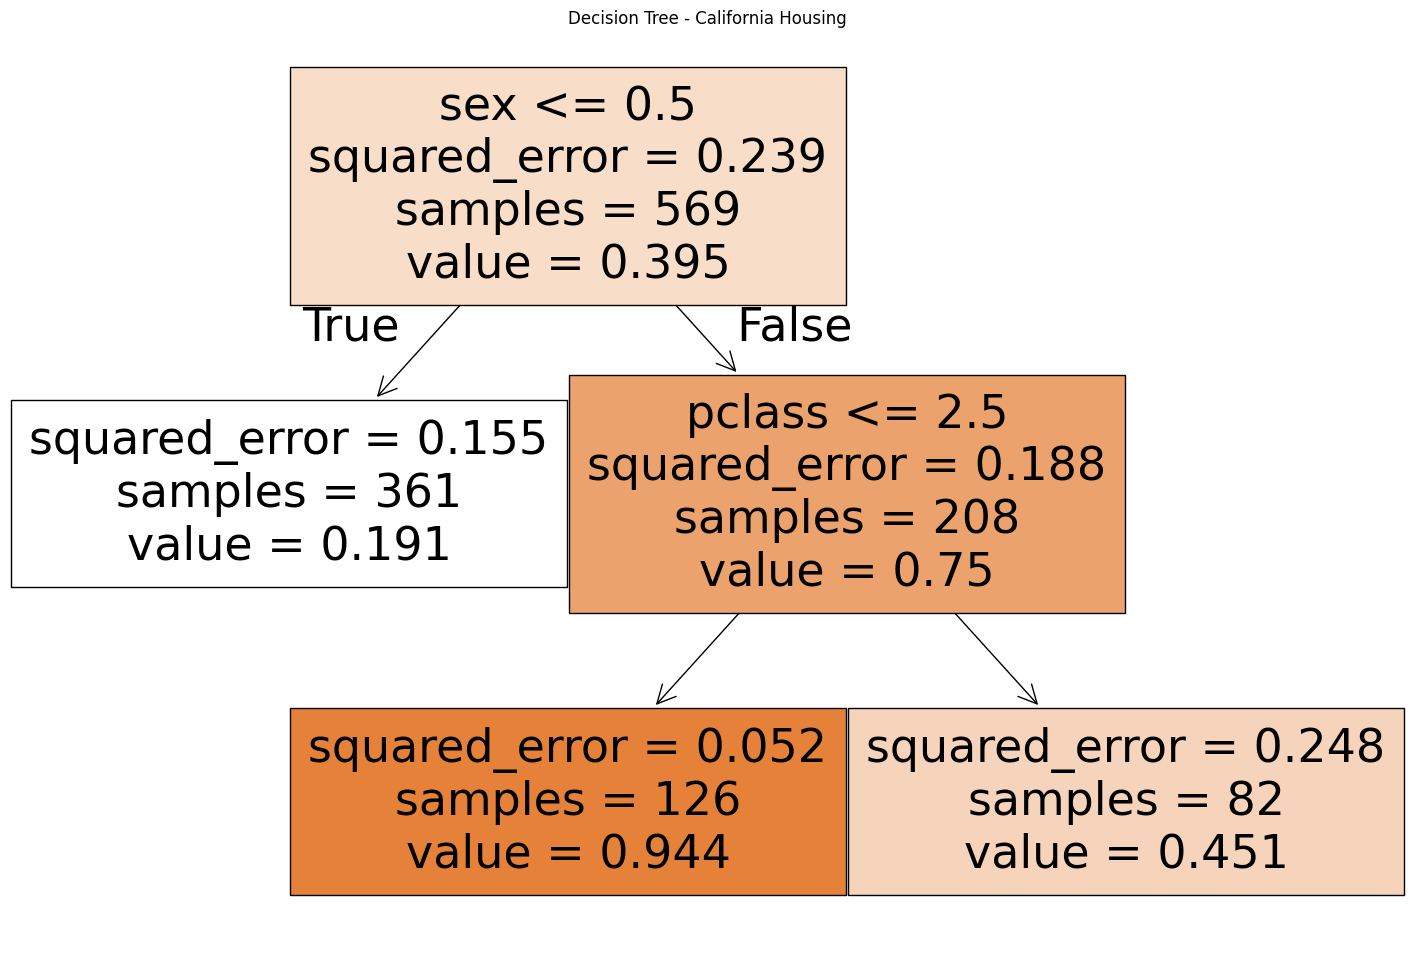

RMSE: 0.4190194698789927
R² Score: 0.28762290918665534


In [18]:
dtr = DecisionTreeRegressor(max_depth=4, ccp_alpha=0.01, random_state=42)
dtr.fit(X_train, y_train)

plt.figure(figsize=(18,12))
plot_tree(dtr, feature_names=X.columns, filled=True)
plt.title("Decision Tree - California Housing")
plt.show()

y_pred = dtr.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))